In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 28*28))
x_test  = tf.reshape(x_test, (-1, 28*28))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [2]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Rescaling(scale=1.0/255.0, offset=0))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [3]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=50, verbose=2)

Epoch 1/50
235/235 - 3s - loss: 0.5429 - sparse_categorical_accuracy: 0.8104 - val_loss: 0.4342 - val_sparse_categorical_accuracy: 0.8437 - 3s/epoch - 14ms/step
Epoch 2/50
235/235 - 2s - loss: 0.3760 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.3787 - val_sparse_categorical_accuracy: 0.8651 - 2s/epoch - 9ms/step
Epoch 3/50
235/235 - 2s - loss: 0.3345 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.3620 - val_sparse_categorical_accuracy: 0.8700 - 2s/epoch - 9ms/step
Epoch 4/50
235/235 - 2s - loss: 0.3100 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.3388 - val_sparse_categorical_accuracy: 0.8792 - 2s/epoch - 9ms/step
Epoch 5/50
235/235 - 2s - loss: 0.2887 - sparse_categorical_accuracy: 0.8935 - val_loss: 0.3417 - val_sparse_categorical_accuracy: 0.8765 - 2s/epoch - 9ms/step
Epoch 6/50
235/235 - 2s - loss: 0.2727 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.3341 - val_sparse_categorical_accuracy: 0.8804 - 2s/epoch - 9ms/step
Epoch 7/50
235/235 - 2s - loss: 0.2632 

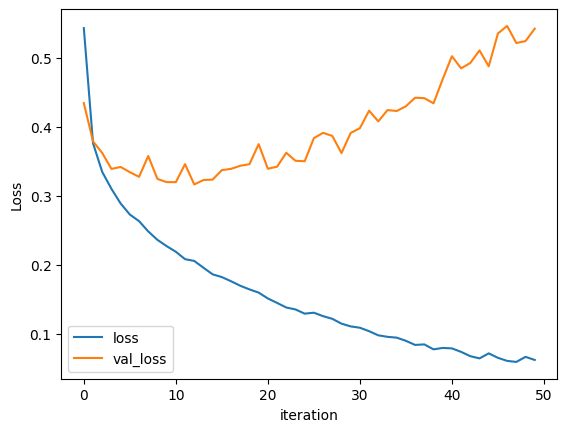

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

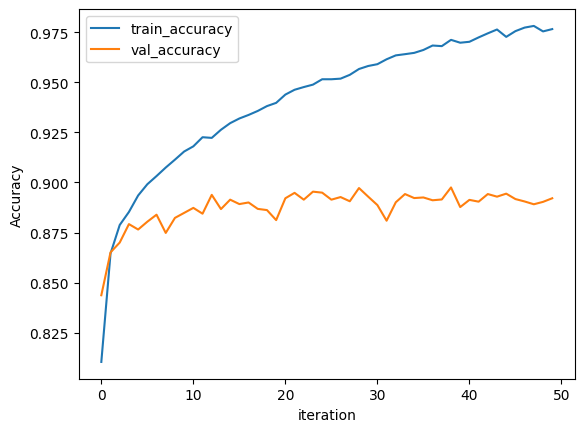

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()